<h1> <center> DiffraPy - Writing/Reading Segy File Example </h1> </center>

******************

Guilherme Zakarewicz¹, Susanne Maciel¹

¹University of Brasília (UnB)

2023

******************

It is possible to use ``DiffraPy`` for [writing and reading segy files using Obspy](https://docs.obspy.org/master/packages/obspy.io.segy.html). We show an example in this interactive Jupyter Notebook using a synthetic gather previously created with ``Heterogeneous_VelocityModel_Example.ipynb``, but you can use this approach to import field data.

### Table of contents <a class='anchor' id='top'></a>

- [1 - Writing segy files](#chapter1)
- [2 - Reading segy files](#chapter2)

### Importing libs and modules

In [1]:
from obspy import read, Trace, Stream, UTCDateTime
from obspy.core import AttribDict
from obspy.io.segy.segy import SEGYTraceHeader, SEGYBinaryFileHeader
from obspy.io.segy.core import _read_segy
import numpy as np
import sys
import matplotlib.pyplot as plt

D:\Arquivos\anaconda3\lib\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
dt = 0.005 #time sampling
dx = 10 #horizontal offset

## 1 - Writing segy files <a class="anchor" id="chapter1"></a>

***************


### Importing synthetic gather shot

In [3]:
files = []

dsx = 5 #Shots spacing in index
nx = 120
nsx = nx
ngx = nx

for i in range(0,nsx,dsx):
    filename = "Data/CSG/Diff_velvector2_{}".format(i)
    with open(filename, 'rb') as file:
        (gather) = np.load(file)
        files.append(gather)
        
shot_0 = files[0]

### Creating Obspy Trace and Stream objects

In [4]:
ntr = np.shape(shot_0)[1]
stream = Stream()
offset = 0

for i in range(ntr):
    trace_i = shot_0[:,i] #looping through each vertical trace of a gather shot
    trace_i = np.require(trace_i, dtype=np.float32)
    trace = Trace(data=trace_i)
    trace.stats.delta = dt
    trace.stats.starttime = UTCDateTime(2023,1,1,1,1,1)
    trace.stats._format = "segy"
    trace.stats.distance = offset
    if not hasattr(trace.stats, "segy.trace_header"):
        trace.stats.segy = {}
    trace.stats.segy.trace_header = SEGYTraceHeader()
    stream.append(trace)
    offset = offset + dx

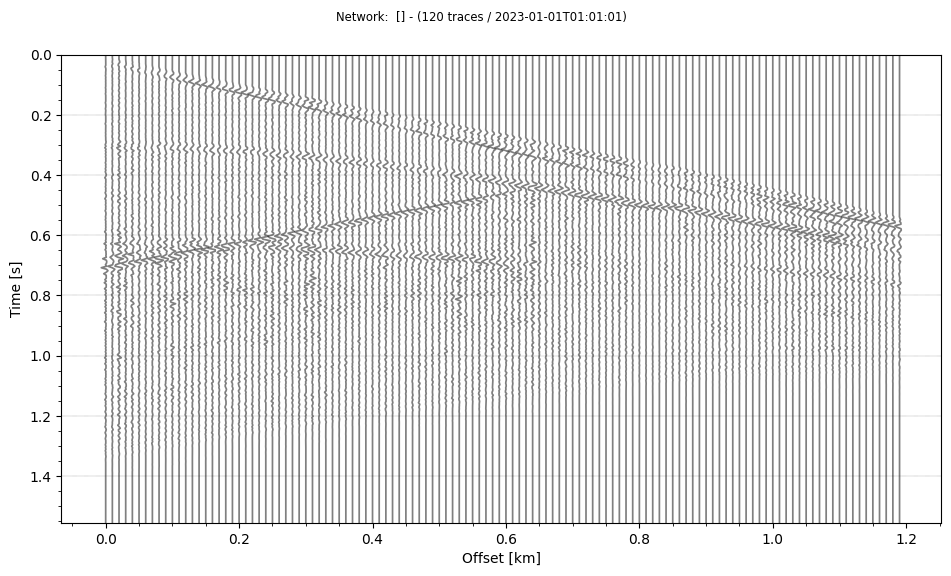

In [5]:
stream.plot(type='section',time_down=True,linewidth=1.25, grid_linewidth=.25,show=False)

### Writing a segy file

In [6]:
stream.write("Data/SEGY_files/TEST.sgy", format="SEGY", data_encoding=1,byteorder=sys.byteorder)

We can repeat the process for all gathers

In [7]:
streams = []

for count,gather in enumerate(files):
    ntr = np.shape(gather)[1]
    stream = Stream()
    offset = 0
    
    for i in range(ntr):
        trace_i = gather[:,i]
        trace_i = np.require(trace_i, dtype=np.float32)
        trace = Trace(data=trace_i)
        trace.stats.delta = dt
        trace.stats.starttime = UTCDateTime(2023,1,1,1,1,1)
        trace.stats._format = "segy"
        trace.stats.distance = offset
        if not hasattr(trace.stats, "segy.trace_header"):
            trace.stats.segy = {}
        trace.stats.segy.trace_header = SEGYTraceHeader()
        stream.append(trace)
        offset = offset + dx
        
    streams.append(stream)    
    stream.write("Data/SEGY_files/gather_{}.sgy".format(count), format="SEGY", data_encoding=1,byteorder=sys.byteorder)

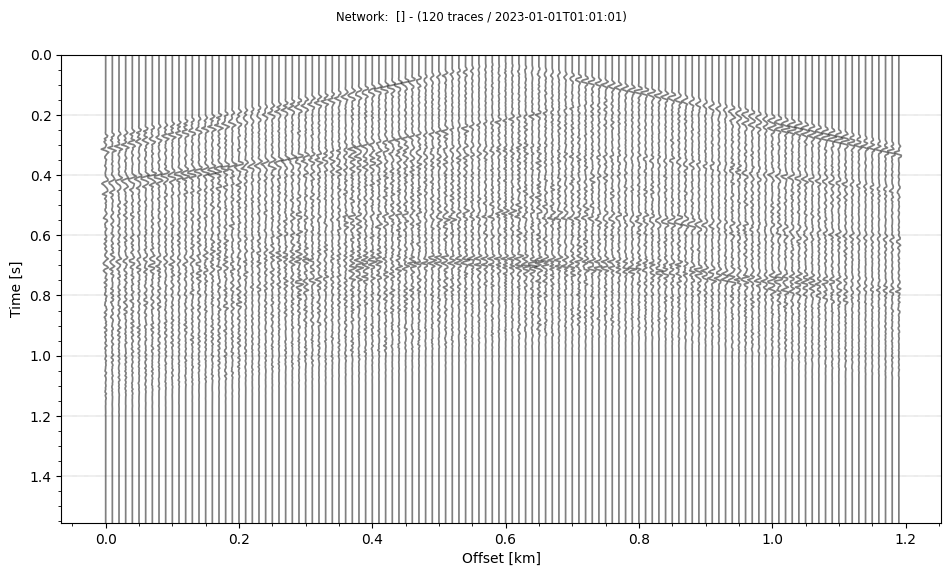

In [8]:
streams[12].plot(type='section',time_down=True,linewidth=1.25, grid_linewidth=.25,show=False)

## 2 - Reading segy files <a class="anchor" id="chapter2"></a>

***************

### Importing libs and modules

In [9]:
from obspy import read, Trace, Stream, UTCDateTime
from obspy.core import AttribDict
from obspy.io.segy.segy import SEGYTraceHeader, SEGYBinaryFileHeader
from obspy.io.segy.core import _read_segy
import numpy as np
import sys
import matplotlib.pyplot as plt
import Diffrapy as df

In [10]:
filename = "Data/SEGY_files/TEST.sgy"
st = _read_segy(filename)

In [11]:
st #gather

120 Trace(s) in Stream:

Seq. No. in line:    0 | 2023-01-01T01:01:01.000000Z - 2023-01-01T01:01:02.560000Z | 200.0 Hz, 313 samples
...
(118 other traces)
...
Seq. No. in line:    0 | 2023-01-01T01:01:01.000000Z - 2023-01-01T01:01:02.560000Z | 200.0 Hz, 313 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [12]:
st[0].stats #individual trace

         network: 
         station: 
        location: 
         channel: 
       starttime: 2023-01-01T01:01:01.000000Z
         endtime: 2023-01-01T01:01:02.560000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 313
           calib: 1.0
            segy: AttribDict({'trace_header': LazyTraceHeaderAttribDict({'unpacked_header': b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x009\x01\x88\x13\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe7\x07\x01\x00\x01\x00\

****

We recommend creating a numpy.ndarray file for applying the ``DiffraPy`` functions

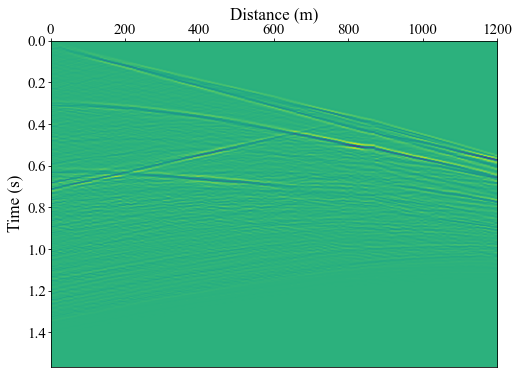

In [13]:
dt = st[0].stats.delta
dx = 10
dz = dx
nx = np.shape(st)[0]
nt = np.shape(st)[1]

gather = np.zeros([nx,nt])

for i in range(len(gather)):
    gather[i] = st[i]

gather = gather.T
    
df.plot(gather,"gather_shot",nx,dx,nt,dt,"Distance (m)","Time (s)")

We can repeat the process for all segy files

In [14]:
streams = []

num_streams = 24 #number of gathers to read

for i in range(num_streams):
    filename = "Data/SEGY_files/gather_{}.sgy".format(i) #Change the path with your gathers' names. 
    st = _read_segy(filename)
    streams.append(st)
    
dt = st[0].stats.delta
dx = 10
dz = dx
nx = np.shape(st)[0]
nt = np.shape(st)[1]

In [15]:
files = []

for count,st in enumerate(streams):
    gather = np.zeros([nx,nt])
    for j in range(len(gather)):
        gather[j] = st[j]
    gather = gather.T
    files.append(gather)

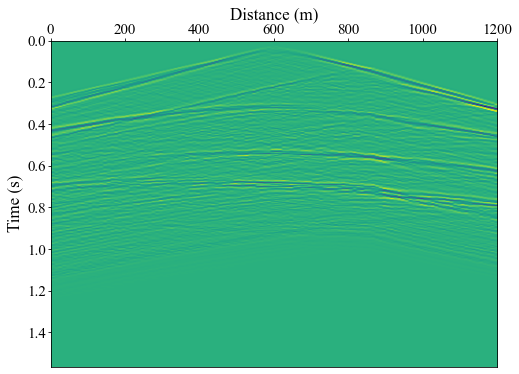

In [18]:
df.plot(files[12],"gather_shot",nx,dx,nt,dt,"Distance (m)","Time (s)")